In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import os, shutil
from dotenv import load_dotenv
import time
from collections import Counter
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image as IMG


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/kristy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
#filepath = '/Users/kristy/Documents/Data Science Material/Metis/6 Deep Learning/Deep Learning Project/Mechanical Tools Image dataset'
filepath = 'Mechanical Tools Image dataset'

Use the link code as reference to loop over files [code](https://github.com/crystal-ctrl/deep_learning_project/blob/main/workflow/1_EDA.ipynb)

In [3]:
dataset = {'image_path':[],'category':[]}
for category in os.listdir(filepath):
    print(category)
    if category != '.DS_Store':        
        for image in os.listdir(filepath +"/"+category):
            if image != '.DS_Store':
                dataset['image_path'].append(filepath +"/"+category+"/"+ image)
                dataset['category'].append(category)
dataset = pd.DataFrame(dataset)    
dataset.head()

Gasoline Can
Hammer
.DS_Store
Screw Driver
Wrench
Rope
Pebbels
Toolbox
pliers


,image_path,category
0,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can
1,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can
2,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can
3,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can
4,Mechanical Tools Image dataset/Gasoline Can/Ga...,Gasoline Can


In [4]:
dataset.describe()

,image_path,category
count,6916,6916
unique,6916,8
top,Mechanical Tools Image dataset/Gasoline Can/Ga...,Screw Driver
freq,1,1738


/Users/kristy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='category'>

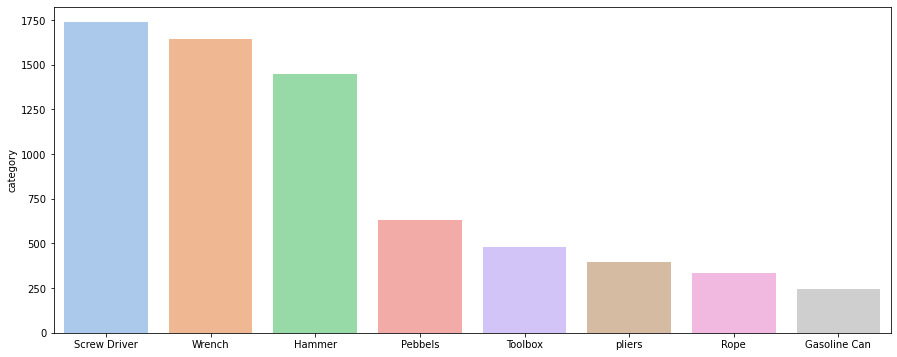

In [5]:
plt.figure(figsize=(15,6))
sns.barplot(dataset.category.value_counts().index,dataset.category.value_counts(),palette='pastel')

### Show image samples

Mechanical Tools Image dataset/Gasoline Can/GasolineCan50.jpg
Mechanical Tools Image dataset/Hammer/Hammer432.JPEG
Mechanical Tools Image dataset/Screw Driver/ScrewDriver1895.JPEG
Mechanical Tools Image dataset/Wrench/Wrench990.JPEG
Mechanical Tools Image dataset/Rope/Rope85.jpg
Mechanical Tools Image dataset/Pebbels/Pebbels565.jpg
Mechanical Tools Image dataset/Toolbox/Toolbox345.jpg
Mechanical Tools Image dataset/pliers/Pliers177.jpg


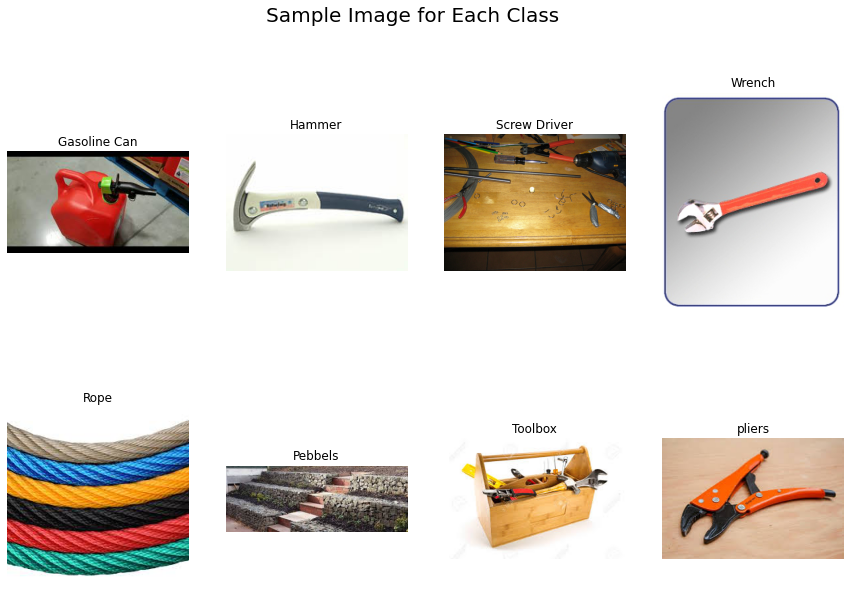

In [8]:
fig, ax = plt.subplots(2, 4,figsize= (15,10))
fig.suptitle('Sample Image for Each Class', fontsize=20)

for n,cate in enumerate(dataset.category.unique()):
    ax = plt.subplot(2,4,n+1)
    index = random.choice(dataset[dataset.category == cate].index)
    img = mpimg.imread(dataset.image_path[index])
    print(dataset.image_path[index])
    plt.imshow(img)
    plt.title(cate)
    plt.axis('off')


### Data Augmentation

In [16]:
IMGgen = IMG.ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

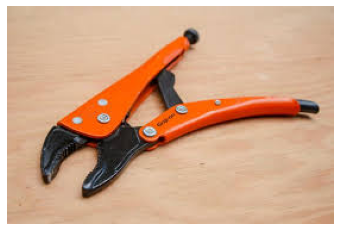

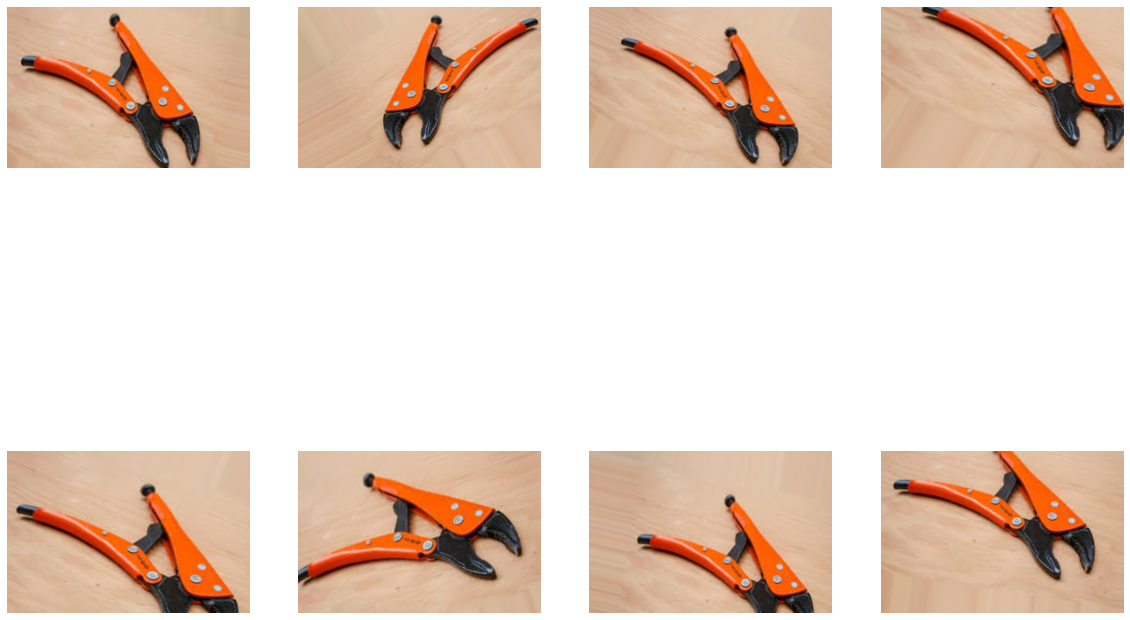

In [22]:
augment_sample  = "aument_sample/Pliers177.jpg"
img = IMG.load_img(augment_sample)  
x = IMG.img_to_array(img)  
plt.plot(figsize = (8,5))
plt.axis('off')

plt.imshow(x/np.max(x))
x = tf.expand_dims(x,axis = 0) 
fig,ax = plt.subplots(2,4,figsize = (20,15))
#fig.suptitle ('Augmentation example',fontsize =15)

i = 1
for batch in IMGgen.flow(x, batch_size=2,
          save_to_dir='aument_sample', save_prefix='tool', save_format='jpeg'):
    ax = plt.subplot(2,4,i)
    plt.imshow(batch[0]/np.max(batch[0]))
    plt.axis('off')
    i += 1
    if i > 8:
        break
        


### Seperate Images to train, test and validation folders

In [23]:
if os.path.exists('work_data') == False:
    work_path = "/Users/kristy/Documents/Data Science Material/Metis/6 Deep Learning/Deep Learning Project"
    original_dir = work_path +"/" + "Mechanical Tools Image dataset"

    cate = [cate for cate in os.listdir(original_dir)]
    cate.remove('.DS_Store')
    cate

    work_dir = work_path +"/"+'work_data'
    os.mkdir(work_dir)

    train_dir = os.path.join(work_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(work_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(work_dir, 'test')
    os.mkdir(test_dir)

    for x in ['train','validation','test']:
        up_dir = work_dir + "/" +x
        for y in cate:
            os.mkdir(os.path.join(up_dir,y))


    for x in cate:
        orginal_dir = original_dir +"/" + str(x)
        img_num =len([name for name in os.listdir(orginal_dir)])
        sep_n = int(img_num/5)
        file_list = os.listdir(orginal_dir)  
        test_dir = work_dir + "/" + "test"+ "/" + x
        val_dir = work_dir + "/" + "validation"+ "/" + x
        train_dir = work_dir + "/" + "train"+ "/" + x
        for file in file_list[:sep_n]:
            src = os.path.join(orginal_dir, file)
            dst = os.path.join(test_dir, file)
            shutil.copyfile(src, dst)
        for file in file_list[sep_n:2*sep_n]:
            src = os.path.join(orginal_dir, file)
            dst = os.path.join(val_dir, file)
            shutil.copyfile(src, dst)    
        for file in file_list[2*sep_n:img_num]:
            src = os.path.join(orginal_dir, file)
            dst = os.path.join(train_dir, file)
            shutil.copyfile(src, dst)  

### Transfering image to array and save

In [24]:
def img_to_array(img_path):
    img=  IMG.load_img(img_path,target_size=[150,150])
    x = IMG.img_to_array(img)
    return x

In [25]:
filepath = 'work_data'

work_data_df = {'image_path':[],'category':[],'class':[]}

for class_ in os.listdir(filepath):
    if class_ != '.DS_Store':  
        for category in os.listdir(filepath +"/"+class_):
            if category != '.DS_Store':        
                for image in os.listdir(filepath +"/"+class_ +"/"+category):
                    if image != '.DS_Store':
                        work_data_df['image_path'].append(filepath +"/"+class_+"/"+category+"/"+ image)
                        work_data_df['category'].append(category)
                        work_data_df['class'].append(class_)
work_data_df = pd.DataFrame(work_data_df)    
work_data_df.head()

,image_path,category,class
0,work_data/test/Gasoline Can/GasolineCan175.jpg,Gasoline Can,test
1,work_data/test/Gasoline Can/GasolineCan161.jpg,Gasoline Can,test
2,work_data/test/Gasoline Can/GasolineCan149.jpg,Gasoline Can,test
3,work_data/test/Gasoline Can/GasolineCan83.jpg,Gasoline Can,test
4,work_data/test/Gasoline Can/GasolineCan97.jpg,Gasoline Can,test


In [45]:
work_data_df.to_csv('work_data_df')

In [37]:
X_train = []
X_val = []
X_test = []

data_train = work_data_df[work_data_df['class'] == 'train']
y_train = data_train.category.astype("category").cat.codes
y_train_hotcode = keras.utils.to_categorical(y_train)
for index in data_train.index:
    X_train.append(img_to_array(data_train.loc[index,'image_path']))
    
data_val = work_data_df[work_data_df['class'] == 'validation']
y_val = data_val.category.astype("category").cat.codes
y_val_hotcode = keras.utils.to_categorical(y_train)
for index in data_val.index:
    X_val.append(img_to_array(data_val.loc[index,'image_path']))    
    
data_test = work_data_df[work_data_df['class'] == 'test']
y_test = data_test.category.astype("category").cat.codes
y_test_hotcode = keras.utils.to_categorical(y_test)
for index in data_test.index:
    X_test.append(img_to_array((data_test.loc[index,'image_path'])))   
    
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

In [38]:
### Save X_digit, y_digit
image_data_array = (X_train, X_test,X_val,y_train,y_test,y_val)
with open('image_data_array.pickle','wb') as file:
    pickle.dump(image_data_array,file)

In [39]:
print(f"We have {len(X_train)} train dataset")
print(f"We have {len(X_val)} train dataset")
print(f"We have {len(X_test)} test dataset")

We have 4158 train dataset
We have 1379 train dataset
We have 1379 test dataset


In [44]:
global category_map
category_int_map = dict(zip(data_train.category,y_train))
int_category_map = dict(zip(y_train,data_train.category))
int_category_map

{0: 'Gasoline Can',
 1: 'Hammer',
 4: 'Screw Driver',
 6: 'Wrench',
 3: 'Rope',
 2: 'Pebbels',
 5: 'Toolbox',
 7: 'pliers'}

In [43]:
category_int_map

{'Gasoline Can': 0,
 'Hammer': 1,
 'Screw Driver': 4,
 'Wrench': 6,
 'Rope': 3,
 'Pebbels': 2,
 'Toolbox': 5,
 'pliers': 7}